In [79]:
import pandas as pd
import importlib
import activity_data_importer

# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.copy_on_write = True

# reload my module each time I execute to get new changes without restarting kernel
importlib.reload(activity_data_importer)

df = activity_data_importer.import_activity_data()
filtered_df = activity_data_importer.drop_erroneous_rows(df)
print(f"Dropped {len(df.index) - len(filtered_df.index)} records due to erroneous measurements.")

df

Dropped 4 records due to erroneous measurements.


,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Distance (km),Average Speed (km/h),Average Moving Speed (km/h),Max. Speed (km/h),Elevation Gain (m),...,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
0,2024-12-02T17:20:29+01:00,2024-12-02T17:55:37+01:00,00:35:08,Strength Training,Uncategorized,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,256.0,NaN,NaN,29.970588,29.0,31.0
1,2024-12-01T10:30:08+01:00,2024-12-01T11:05:50+01:00,00:35:42,Running,Race,9.95481,16.729199,16.762247,23.850000,79.45,...,1.5,181.44,193.0,153.67,6426.0,NaN,NaN,11.490340,9.0,18.0
2,2024-12-01T10:12:06+01:00,2024-12-01T10:23:11+01:00,00:11:05,Running,Uncategorized,1.57320,8.517600,9.486633,13.435200,8.68,...,NaN,145.23,239.0,95.74,1760.0,NaN,NaN,22.902810,19.0,28.0
3,2024-11-30T08:52:24+01:00,2024-11-30T10:50:49+01:00,01:55:33,Running,Uncategorized,23.37705,12.139200,12.177149,15.685200,472.01,...,NaN,175.20,201.0,115.46,20238.0,NaN,NaN,17.631282,15.0,29.0
4,2024-11-29T16:04:12+01:00,2024-11-29T17:09:38+01:00,00:58:46,Mountain Biking,Uncategorized,20.12749,20.548801,20.702561,43.768800,374.48,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,10.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2021-11-24T15:49:03+01:00,2021-11-24T16:34:30+01:00,00:45:27,Trail Running,Uncategorized,8.05562,10.634400,10.646061,16.830001,167.00,...,0.9,170.20,191.0,104.19,7734.0,NaN,NaN,21.058698,18.0,28.0
1097,2021-11-23T18:18:35+01:00,2021-11-23T19:43:56+01:00,01:25:21,Running,Uncategorized,14.81816,10.414800,11.863943,20.188799,59.00,...,0.5,141.97,249.0,120.77,12340.0,NaN,NaN,19.255316,16.0,27.0
1098,2021-11-21T12:17:21+01:00,2021-11-21T14:22:33+01:00,02:04:46,Trail Running,Uncategorized,20.10268,9.666000,10.212630,17.701199,415.00,...,2.0,156.19,246.0,102.37,19746.0,NaN,NaN,17.494922,12.0,23.0
1099,2021-11-20T07:57:00+01:00,2021-11-20T08:41:48+01:00,00:44:48,Trail Running,Uncategorized,8.14423,10.904400,10.964320,17.265600,180.00,...,0.4,171.11,200.0,106.29,7708.0,NaN,NaN,20.725323,17.0,26.0


In [80]:
import numpy as np

filter_criteria = np.where((df['Activity Type'] == 'Running') & (df['Distance (km)'] >= 41) & (df['Distance (km)'] <= 44))
marathon_events = df.loc[filter_criteria]
marathon_events

,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Distance (km),Average Speed (km/h),Average Moving Speed (km/h),Max. Speed (km/h),Elevation Gain (m),...,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
89,2024-09-08T09:00:15+02:00,2024-09-08T12:15:26+02:00,03:15:11,Running,Race,42.72382,13.1328,13.144879,20.322000,154.77,...,NaN,175.69,225.0,124.58,34188.0,NaN,NaN,29.142433,27.0,31.0
667,2023-03-12T10:00:04+01:00,2023-03-12T12:50:16+01:00,02:50:11,Running,Race,42.25573,14.8968,14.913059,17.297999,64.00,...,0.7,176.08,190.0,141.01,30518.0,NaN,NaN,11.597362,6.0,19.0
838,2022-09-18T09:30:17+02:00,2022-09-18T12:43:42+02:00,03:13:25,Running,Uncategorized,42.45700,13.1724,13.186443,15.318000,67.00,...,NaN,171.78,181.0,127.80,33130.0,NaN,NaN,19.117746,17.0,22.0
842,2022-09-11T09:00:07+02:00,2022-09-11T11:58:15+02:00,02:58:08,Running,Race,42.36290,14.2704,14.343673,17.668800,68.00,...,1.1,171.44,182.0,138.78,30360.0,NaN,NaN,21.687323,18.0,24.0
938,2022-05-14T19:07:33+02:00,2022-05-14T22:07:54+02:00,03:00:21,Running,Race,42.48746,14.1372,14.158350,18.676801,40.00,...,0.8,174.62,186.0,134.89,31078.0,NaN,NaN,26.566400,24.0,31.0


In [81]:
from dateutil.relativedelta import relativedelta

# Creating a dataframe consisting of columns 'Training Block Start' and 'Race Date'
marathon_event_datetimes = pd.to_datetime(marathon_events['Start Time'], utc=True)
marathon_event_training_blocks = marathon_event_datetimes.apply(lambda dt: dt - relativedelta(months=3))
marathon_event_training_blocks = pd.DataFrame({
    'Training Block Start': marathon_event_training_blocks.apply(lambda dt: dt.strftime('%Y-%m-%d')),
    'Race Date': marathon_event_datetimes.apply(lambda dt: dt.strftime('%Y-%m-%d')),
})

# Creates a list of dataframes containing all the activities contained within the defined marathon training blocks
def get_marathon_training_block_activities():
    training_block_activities_list = []
    for index, row in marathon_event_training_blocks.iterrows():
        # Getting all activities within a single marathon training block
        training_block_activities = df[
            (df['Start Time'] >= row['Training Block Start']) &
            (df['Start Time'] <= row['Race Date'])
        ]
        training_block_activities_list.append(training_block_activities)
    return training_block_activities_list

training_block_activities_series = pd.Series(get_marathon_training_block_activities())

# Creates a list of series grouped by the activity type and counting the number of occurrences of the types
# Data shape: [[Race Date Timestamp, [Series of activities]], ...]
def get_marathon_training_block_activities_count_list(activities_series):
    training_block_activities_count_list = []
    for index, value in activities_series.items():
        # Grouping marathon training block activities by type and counting number of them
        number_of_activity_types_per_training_block = (value
            .groupby('Activity Type')
            .count()
            .loc[:, 'Start Time']
            .rename('Count')
            .sort_values(ascending=False)
        )
        training_block_activities_count_list.append([marathon_event_datetimes.iloc[index], number_of_activity_types_per_training_block])
    return training_block_activities_count_list

# Get a list of aggregated stats on different activity types for the marathon blocks
def get_marathon_training_block_activities_summations_list(activities_series):
    training_block_activities_time_spent_list = []
    for index, value in activities_series.items():
        value['Duration (h:m:s)'] = pd.to_timedelta(value['Duration (h:m:s)'])
        summations_based_on_activity_type = (value
            .groupby('Activity Type')
            .sum()
            .loc[:, ['Duration (h:m:s)', 'Distance (km)', 'Calories', 'Aerobic Training Effect', 'Anaerobic Training Effect']]
        )
        training_block_activities_time_spent_list.append([marathon_event_datetimes.iloc[index], summations_based_on_activity_type])
    return training_block_activities_time_spent_list

training_block_activities_count_series = pd.Series(get_marathon_training_block_activities_count_list(training_block_activities_series))
training_block_activities_summations_series = pd.Series(get_marathon_training_block_activities_summations_list(training_block_activities_series))

#### Create pie charts depicting the relative number of different activities in a 3-month training block leading up to the event

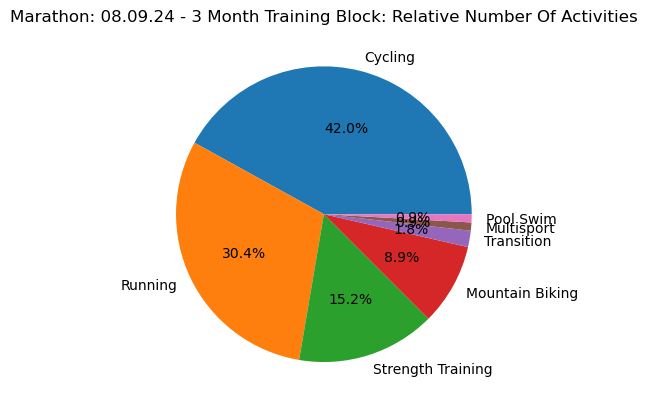

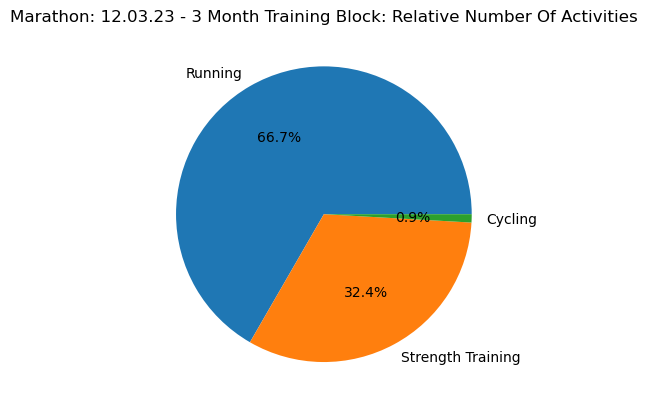

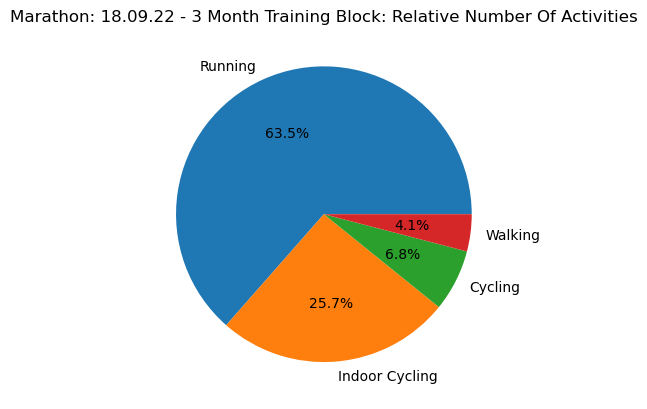

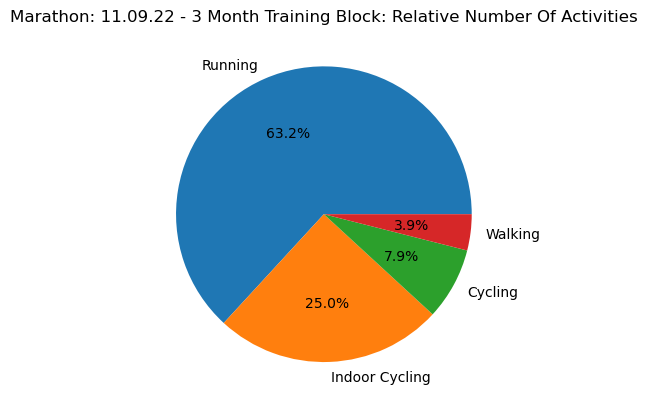

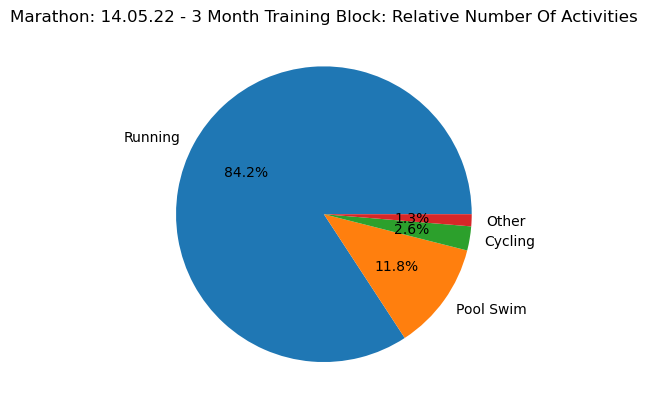

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

for index, value in training_block_activities_count_series.items():
    fig, ax = plt.subplots()
    ax.pie(value[1].values, labels=value[1].keys(), autopct='%1.1f%%')
    ax.set_title(f"Marathon: {value[0].strftime('%d.%m.%y')} - 3 Month Training Block: Relative Number Of Activities")

plt.show()

#### Create pie charts depicting the relative amount of time spent in the different activities of a 3-month training block leading up to the event

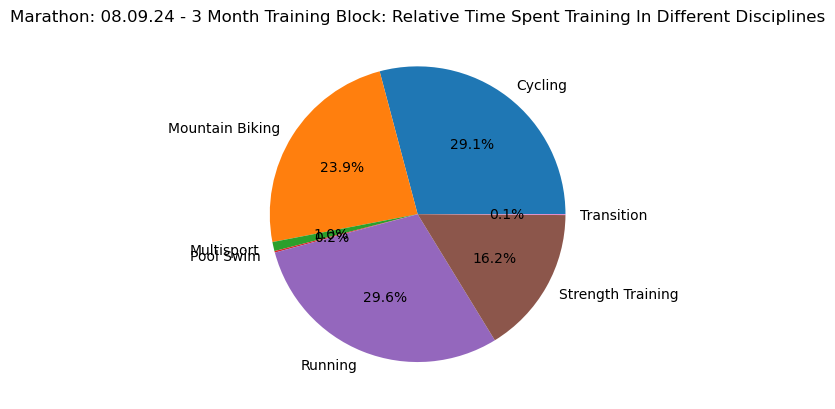

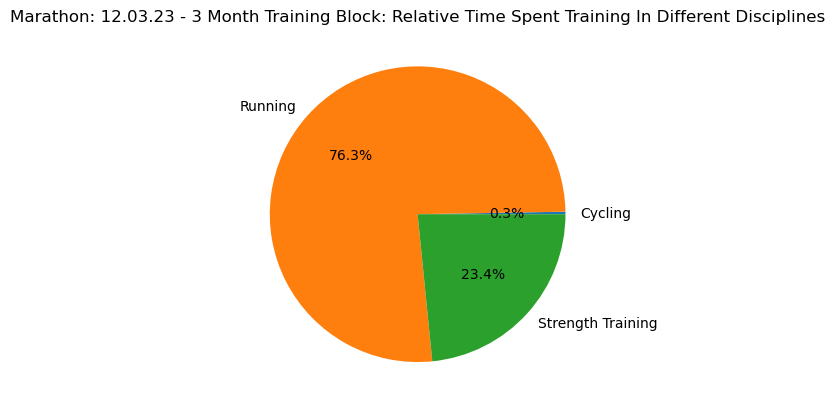

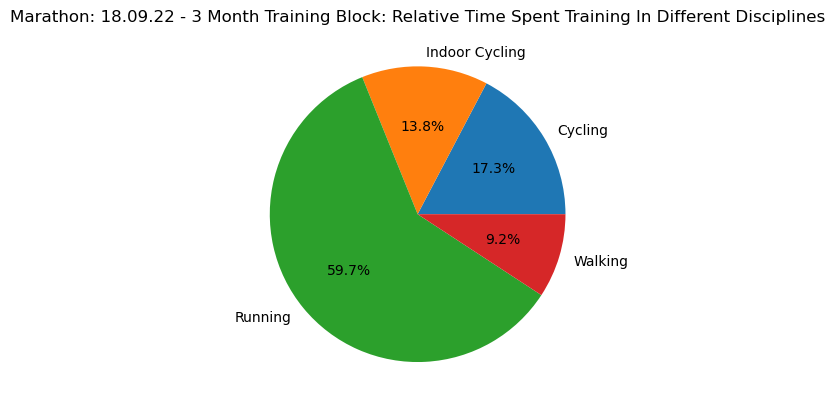

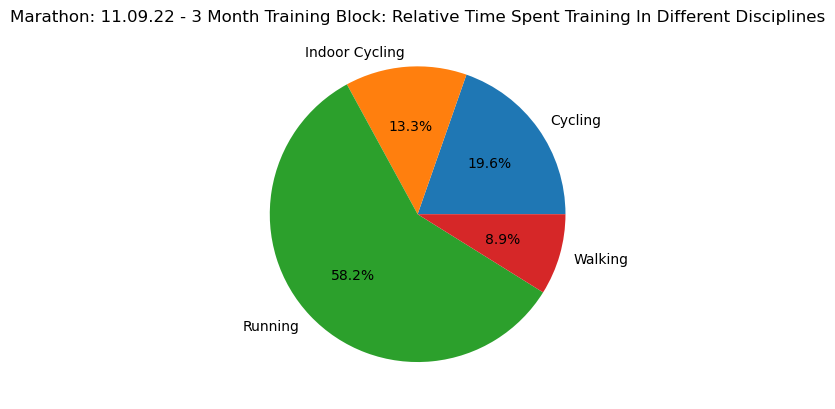

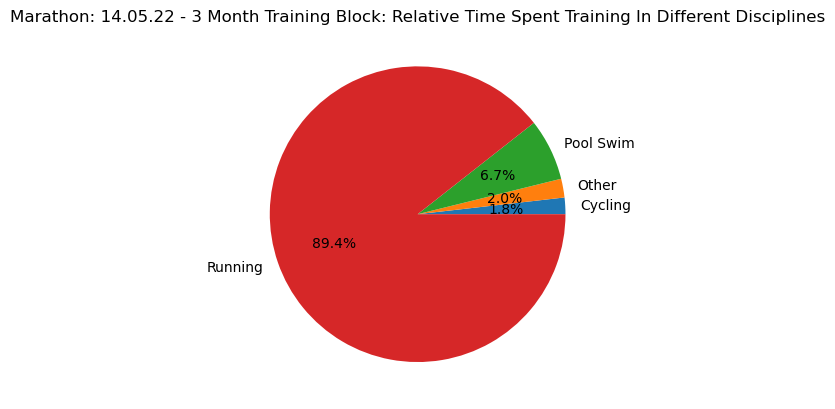

In [83]:
for index, value in training_block_activities_summations_series.items():
    fig, ax = plt.subplots()
    ax.pie(value[1]['Duration (h:m:s)'], labels=value[1].index, autopct='%1.1f%%')
    ax.set_title(f"Marathon: {value[0].strftime('%d.%m.%y')} - 3 Month Training Block: Relative Time Spent Training In Different Disciplines")

plt.show()

#### Create bar charts depicting the total distance covered and calories burnt in different activity types in a 3-month training block leading up to the event

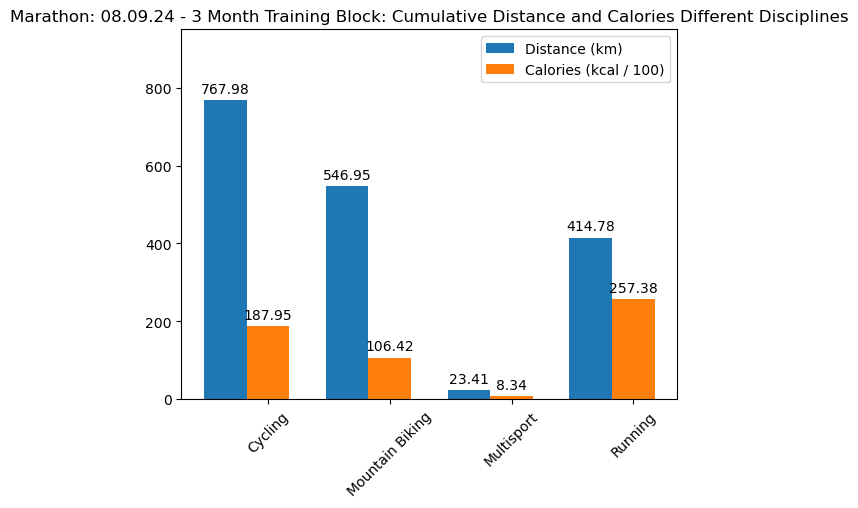

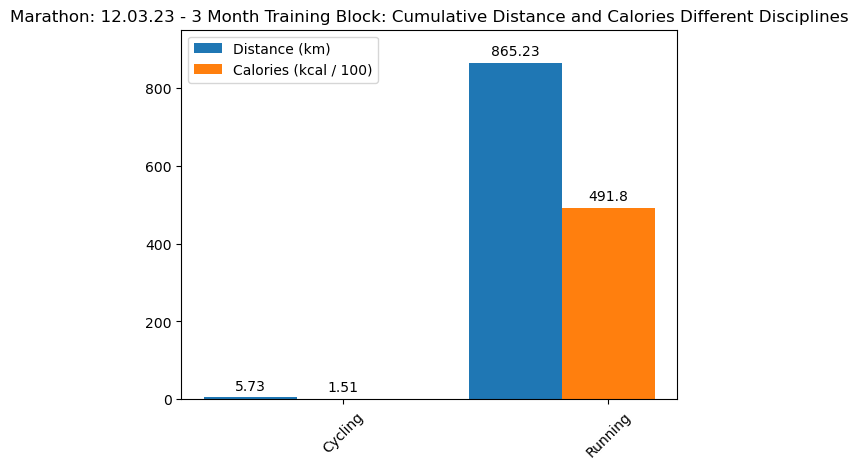

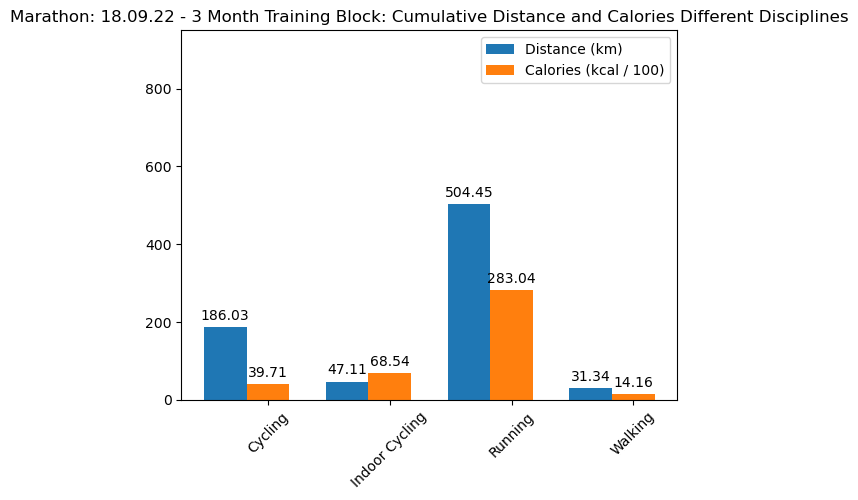

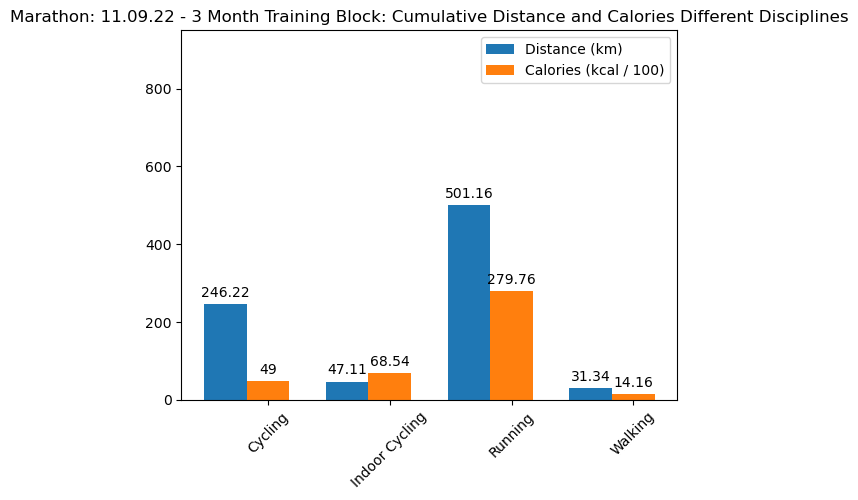

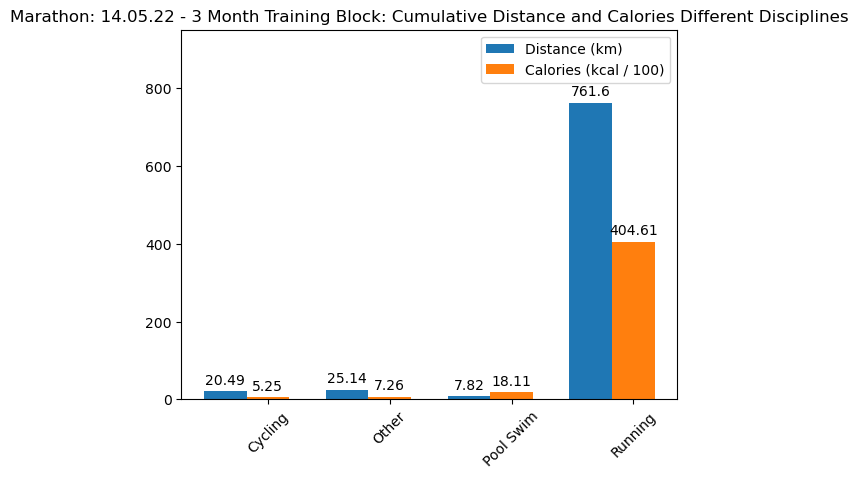

In [84]:
for index, value in training_block_activities_summations_series.items():
    fig, ax = plt.subplots()

    distances = value[1][value[1]['Distance (km)'] > 1]['Distance (km)']
    calories = value[1]['Calories'].drop(labels=value[1]['Calories'].index.symmetric_difference(distances.index))
    bar_data = {
        'Distance (km)': round(distances, 2),
        'Calories (kcal / 100)': round((calories / 100), 2),
    }
    activity_types = distances.index
    x = np.arange(len(activity_types))
    width = 0.35
    multiplier = 0

    for attribute, data in bar_data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_title(f"Marathon: {value[0].strftime('%d.%m.%y')} - 3 Month Training Block: Cumulative Distance and Calories Different Disciplines")
    ax.set_xticks(x + width, activity_types)
    ax.set_ylim(0, 950)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(loc='best')

plt.show()

#### Create bar charts depicting the total aerobic and anaerobic training effect in different activity types in a 3-month training block leading up to the event

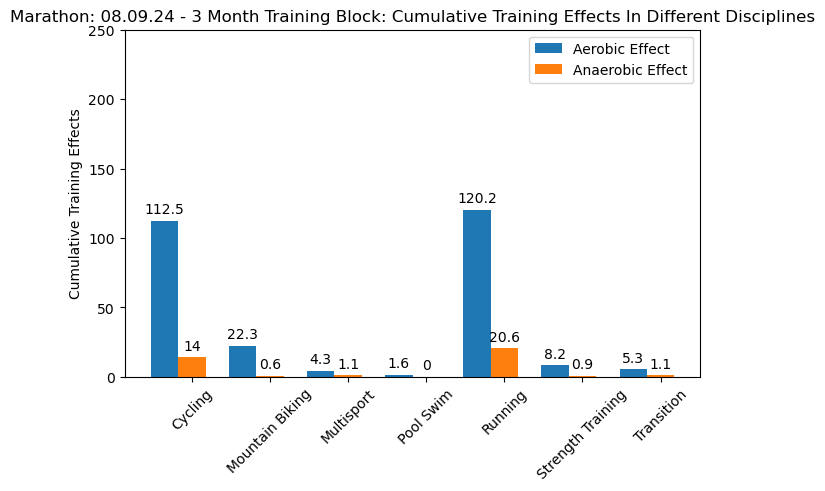

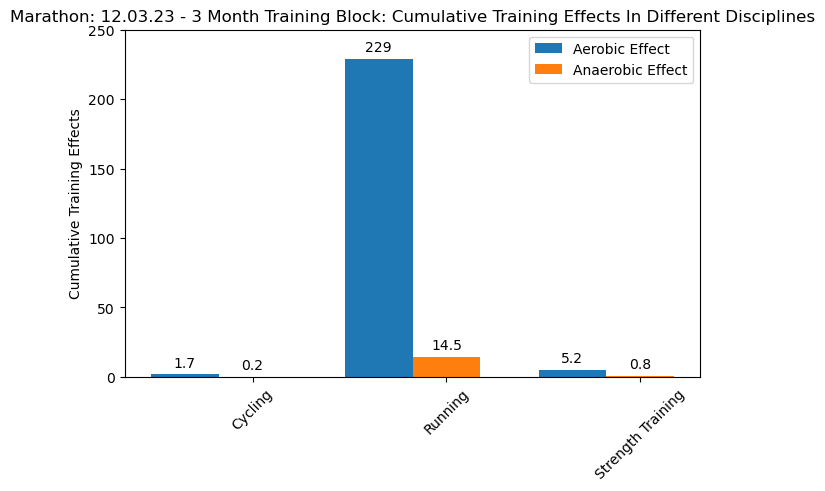

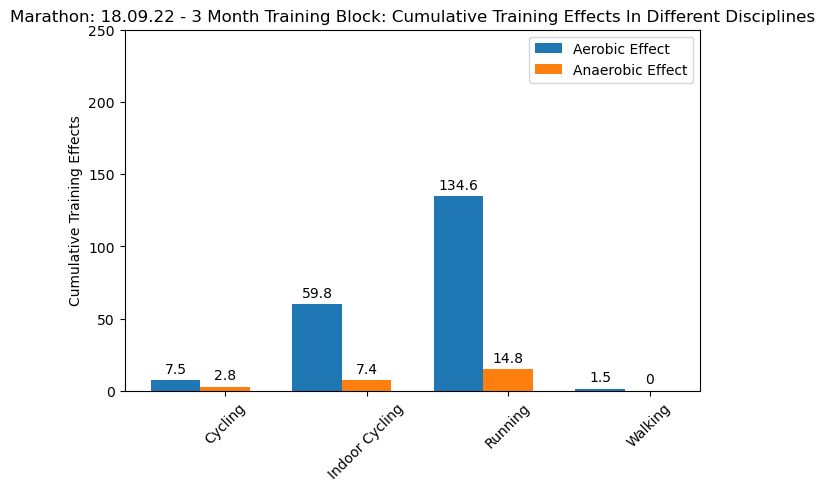

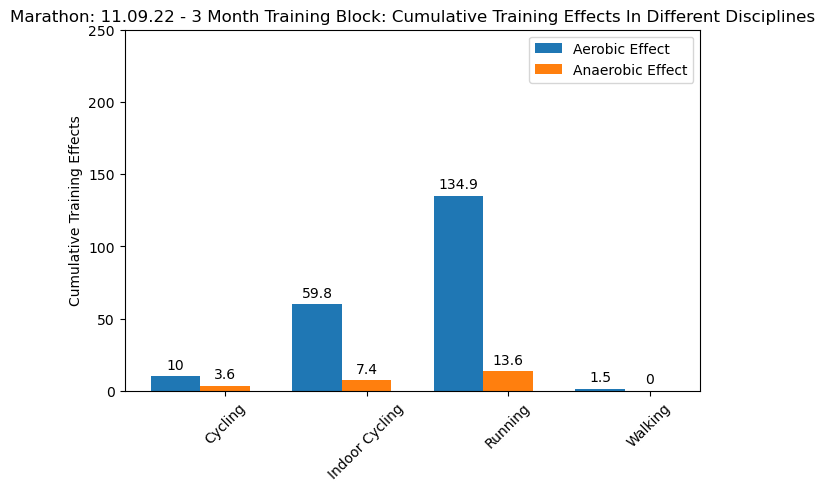

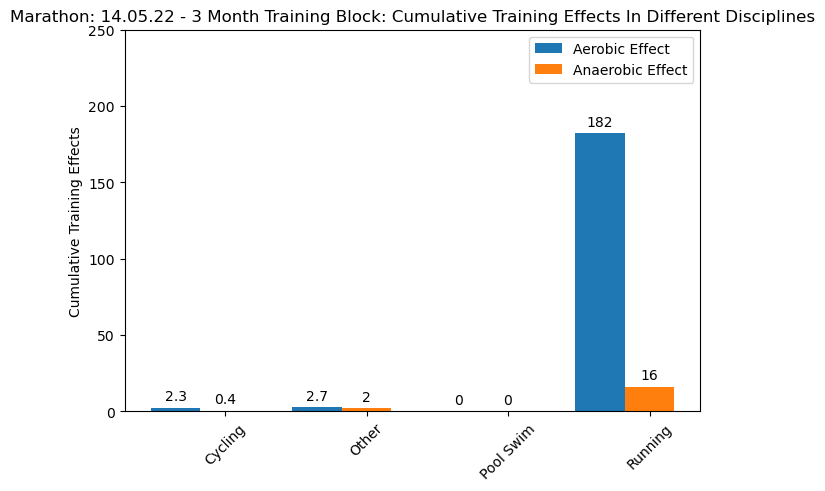

In [85]:
for index, value in training_block_activities_summations_series.items():
    fig, ax = plt.subplots(layout='constrained')

    activity_types = value[1].index
    aerobic_training_effects = value[1]['Aerobic Training Effect']
    anaerobic_training_effects = value[1]['Anaerobic Training Effect']
    training_effects = {
        'Aerobic Effect': aerobic_training_effects,
        'Anaerobic Effect': anaerobic_training_effects,
    }
    x = np.arange(len(activity_types))
    width = 0.35
    multiplier = 0

    for attribute, effects in training_effects.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, effects, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_title(f"Marathon: {value[0].strftime('%d.%m.%y')} - 3 Month Training Block: Cumulative Training Effects In Different Disciplines")
    ax.set_ylabel('Cumulative Training Effects')
    ax.set_xticks(x + width, activity_types)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(loc='best')
    ax.set_ylim(0, 250)

plt.show()

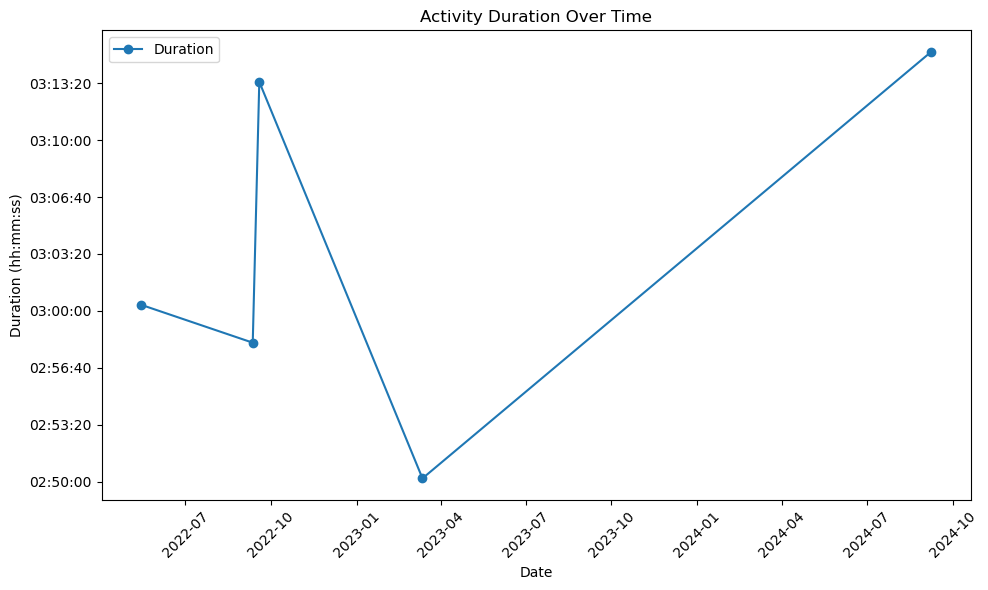

In [86]:
# Convert 'Start Time' to datetime
marathon_events['Start Time'] = pd.to_datetime(marathon_events['Start Time'], utc=True)

# Convert 'Duration (h:m:s)' to timedelta
marathon_events['Duration'] = pd.to_timedelta(marathon_events['Duration (h:m:s)'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    marathon_events['Start Time'],
    marathon_events['Duration'].dt.total_seconds(),
    marker='o',
    linestyle='-',
    label='Duration'
)

# Custom y-axis formatter for mm:ss format
def format_mm_ss(x, _):
    hours   = int(x / 60 / 60)
    minutes = int((x / 60) % 60)
    seconds = int(x % 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_mm_ss))

# Labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Duration (hh:mm:ss)')
plt.title('Activity Duration Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
filter_criteria = np.where((df['Activity Type'] == 'Running') & (df['Event Type'] == 'Race') & (df['Distance (km)'] >= 20) & (df['Distance (km)'] <= 22))
half_marathon_races = df.loc[filter_criteria]
half_marathon_races

,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Distance (km),Average Speed (km/h),Average Moving Speed (km/h),Max. Speed (km/h),Elevation Gain (m),...,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
49,2024-10-13T11:00:11+02:00,2024-10-13T12:20:00+02:00,01:19:49,Running,Race,21.27959,15.994799,16.011998,18.709200,131.78,...,0.9,178.00,188.0,149.77,14146.0,NaN,NaN,21.329465,20.0,24.0
819,2022-10-16T11:00:05+02:00,2022-10-16T12:21:17+02:00,01:21:12,Running,Race,20.39808,15.073199,15.085806,25.797600,40.00,...,1.5,174.91,189.0,143.62,14156.0,NaN,NaN,24.723832,22.0,27.0
941,2022-05-08T09:59:58+02:00,2022-05-08T11:18:07+02:00,01:18:09,Running,Race,21.19710,16.275600,16.304548,19.951199,126.00,...,2.6,177.22,187.0,153.02,13770.0,NaN,NaN,23.014490,19.0,25.0
993,2022-03-12T14:00:02+01:00,2022-03-12T15:23:44+01:00,01:23:42,Running,Race,21.21977,15.210000,15.241596,19.281600,59.00,...,0.1,175.06,187.0,144.82,14558.0,NaN,NaN,22.297729,19.0,25.0


In [88]:
filter_criteria = np.where((df['Activity Type'] == 'Running') & (df['Event Type'] == 'Race') & (df['Distance (km)'] >= 9) & (df['Distance (km)'] <= 11))
ten_k_races = df.loc[filter_criteria]
ten_k_races

,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Distance (km),Average Speed (km/h),Average Moving Speed (km/h),Max. Speed (km/h),Elevation Gain (m),...,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
1,2024-12-01T10:30:08+01:00,2024-12-01T11:05:50+01:00,00:35:42,Running,Race,9.95481,16.729199,16.762247,23.850000,79.45,...,1.5,181.44,193.0,153.67,6426.0,NaN,NaN,11.490340,9.0,18.0
24,2024-11-10T10:50:07+01:00,2024-11-10T11:25:20+01:00,00:35:13,Running,Race,9.95746,16.966799,16.996297,18.777600,41.49,...,0.1,180.17,188.0,156.96,6312.0,NaN,NaN,14.991612,12.0,18.0
339,2024-02-18T15:00:06+01:00,2024-02-18T15:48:12+01:00,00:35:20,Running,Race,9.69708,16.469999,16.514281,18.910799,10.38,...,2.1,175.83,192.0,156.09,6196.0,NaN,NaN,21.494878,19.0,30.0
381,2023-12-31T14:50:03+01:00,2023-12-31T15:25:43+01:00,00:35:40,Running,Race,10.26637,17.265600,17.303325,19.245601,31.00,...,0.4,178.45,196.0,161.24,6962.0,NaN,NaN,16.076888,13.0,19.0
547,2023-06-30T22:00:34+02:00,2023-06-30T22:37:53+02:00,00:37:19,Running,Race,9.73373,15.652800,16.645613,19.648801,27.00,...,0.4,164.58,187.0,158.69,6410.0,NaN,NaN,22.871172,22.0,26.0
567,2023-06-17T18:07:45+02:00,2023-06-17T18:46:58+02:00,00:39:13,Running,Race,10.47680,16.030800,16.047176,19.313999,80.00,...,0.4,176.41,190.0,151.42,7124.0,NaN,NaN,29.101222,27.0,30.0
758,2022-12-31T13:15:00+01:00,2022-12-31T13:52:24+01:00,00:37:24,Running,Race,10.03131,16.088400,16.121308,19.346400,9.00,...,2.1,173.45,196.0,154.60,6516.0,NaN,NaN,19.353520,17.0,22.0
804,2022-11-06T10:08:15+01:00,2022-11-06T10:43:29+01:00,00:35:14,Running,Race,9.85038,16.775999,16.784412,21.499200,33.00,...,0.2,178.59,186.0,156.54,6682.0,NaN,NaN,14.906362,12.0,18.0
935,2022-05-21T18:00:33+02:00,2022-05-21T18:39:32+02:00,00:38:59,Running,Race,10.52210,16.196400,16.237008,19.616400,65.00,...,2.1,177.58,184.0,152.00,6894.0,NaN,NaN,26.437736,25.0,28.0
985,2022-03-19T15:08:22+01:00,2022-03-19T15:47:10+01:00,00:38:48,Running,Race,10.14348,15.685200,15.720903,18.507599,59.00,...,NaN,176.42,192.0,148.19,6908.0,NaN,NaN,17.613447,15.0,26.0


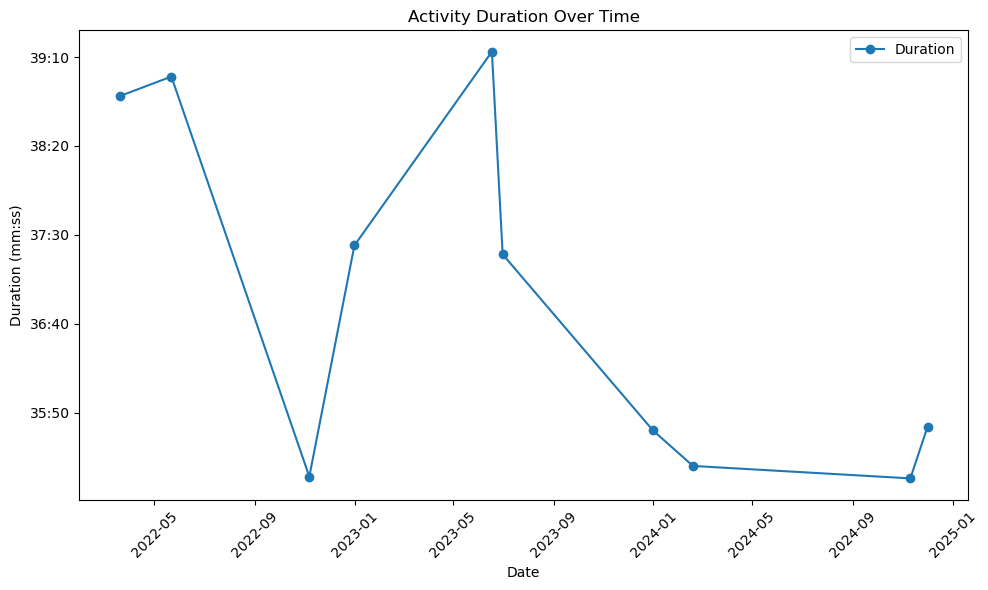

In [89]:
# Convert 'Start Time' to datetime
ten_k_races['Start Time'] = pd.to_datetime(ten_k_races['Start Time'], utc=True)

# Convert 'Duration (h:m:s)' to timedelta
ten_k_races['Duration'] = pd.to_timedelta(ten_k_races['Duration (h:m:s)'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    ten_k_races['Start Time'],
    ten_k_races['Duration'].dt.total_seconds(),
    marker='o',
    linestyle='-',
    label='Duration'
)

# Custom y-axis formatter for mm:ss format
def format_mm_ss(x, _):
    minutes = int(x / 60)
    seconds = int(x % 60)
    return f"{minutes:02d}:{seconds:02d}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_mm_ss))

# Labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Duration (mm:ss)')
plt.title('Activity Duration Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [90]:
filter_criteria = np.where((df['Activity Type'] == 'Running') & (df['Event Type'] == 'Race') & (df['Distance (km)'] >= 4) & (df['Distance (km)'] <= 6))
five_k_races = df.loc[filter_criteria]
five_k_races

,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Distance (km),Average Speed (km/h),Average Moving Speed (km/h),Max. Speed (km/h),Elevation Gain (m),...,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
134,2024-07-25T19:00:07+02:00,2024-07-25T19:19:25+02:00,00:19:18,Running,Race,5.57870,17.337600,17.353120,19.584000,14.13,...,0.9,179.44,200.0,161.03,3428.0,NaN,NaN,29.880507,29.0,34.0
267,2024-04-21T09:59:51+02:00,2024-04-21T10:19:05+02:00,00:19:14,Running,Race,5.38881,16.819200,16.894160,19.515600,53.06,...,NaN,179.44,188.0,156.20,3434.0,NaN,NaN,13.491808,12.0,15.0
628,2023-04-23T09:59:56+02:00,2023-04-23T10:18:33+02:00,00:18:37,Running,Race,5.39253,17.373601,17.399186,20.591999,27.00,...,0.4,176.06,186.0,164.47,3446.0,NaN,NaN,19.373393,17.0,22.0
883,2022-07-28T19:11:38+02:00,2022-07-28T19:33:03+02:00,00:21:25,Running,Race,5.08107,14.241600,14.288176,18.039601,40.00,...,2.2,178.34,186.0,133.07,3788.0,NaN,NaN,29.253543,27.0,33.0
965,2022-04-10T10:00:01+02:00,2022-04-10T10:18:47+02:00,00:18:46,Running,Race,5.40132,17.265600,17.286959,20.825999,31.00,...,NaN,181.88,192.0,158.22,3420.0,NaN,NaN,12.482612,11.0,17.0
972,2022-04-02T13:18:00+02:00,2022-04-02T13:35:45+02:00,00:17:45,Running,Race,5.10251,17.251199,17.291482,21.765600,59.00,...,0.1,181.56,194.0,158.40,3228.0,NaN,NaN,7.575715,5.0,15.0
